# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Uploading the dataset 

In [2]:
path = "D:\\Work\\My work\\IT sem 1\\sem 3\\Stroke prediction\\archive (1)\\healthcare-dataset-stroke-data.csv"

In [3]:
dataset = pd.read_csv(path)

# Preliminary view of the dataset

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
dataset.shape

(5110, 12)

In [6]:
dataset.ndim

2

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data cleaning and transformation

In [9]:
attr1 = ["age", "avg_glucose_level", "bmi"]
attr2 = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

### Removing redundant columns

In [10]:
dataset.drop("id", axis = 1, inplace = True)

### Replacing any 0 and empty values with NULL

##### For numeric values

In [11]:
num_df = dataset.loc[:, attr1]
for col in list(num_df):
        num_df.loc[num_df[col] == 0, col] = np.nan
        dataset[col] = num_df[col]

##### For string values

In [12]:
cat_df = dataset.loc[:, attr2]
for col in list(cat_df):
    c = 0
    for i in cat_df[col]:
        if (i.isspace()==True):
            cat_df.loc[c, col] = np.nan
        c = c+1
    dataset[col] = cat_df[col]

In [13]:
dataset["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [14]:
dataset.loc[dataset["smoking_status"] == 'Unknown','smoking_status'] = np.nan 

In [15]:
dataset["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
dataset.loc[dataset["gender"] == 'Other','gender'] = np.nan 

In [17]:
dataset.isnull().sum()

gender                  1
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

##### Removing NULL values

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
dataset.loc[:, ["bmi"]] = imputer.fit_transform(dataset.loc[:, ["bmi"]])

In [19]:
dataset.dropna(subset = ["gender"], inplace =  True)
dataset1 = dataset.dropna(subset = ["smoking_status"])
dataset2 = dataset.drop("smoking_status", axis = 1)

In [20]:
dataset1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
dataset2.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

### Plotting histogram for dataframe

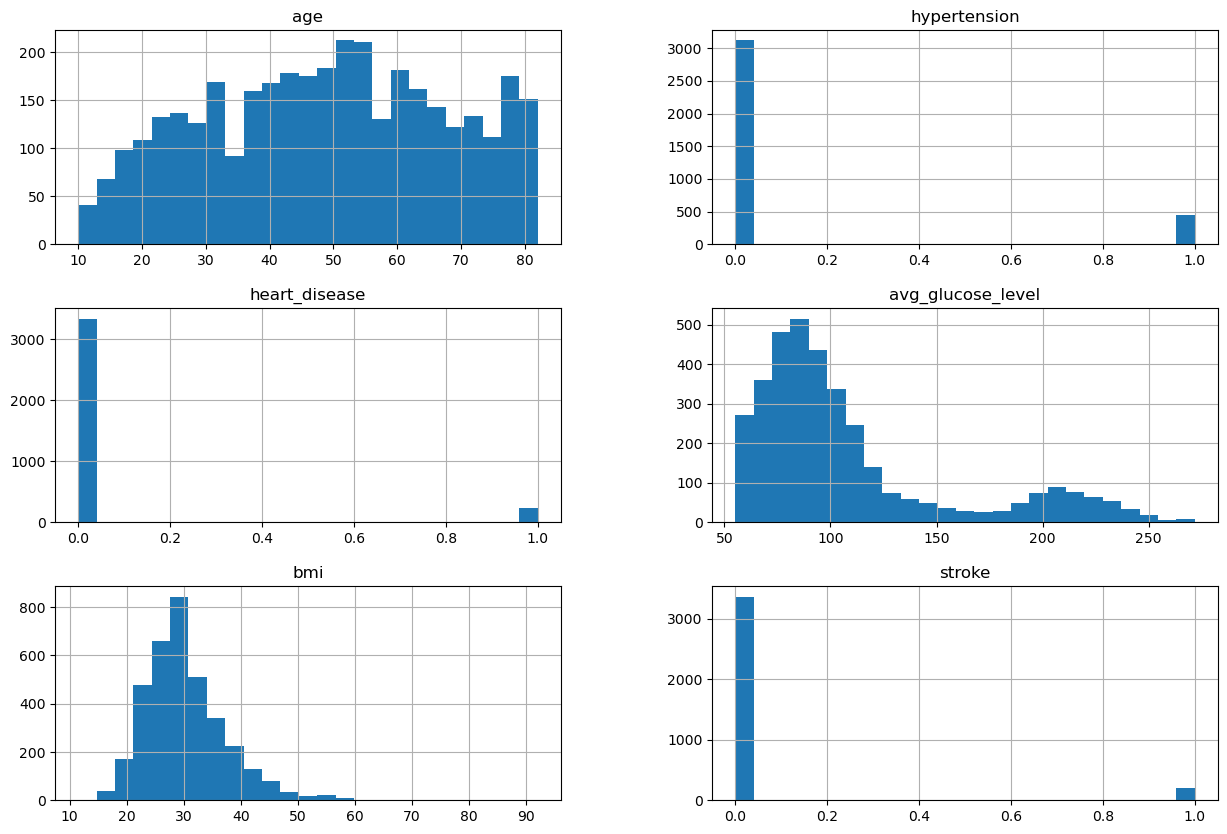

In [22]:
dataset1.hist(bins=25, figsize=(15,10))
plt.show()

### Basic overview of the cleaned data

In [23]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3565 non-null   object 
 1   age                3565 non-null   float64
 2   hypertension       3565 non-null   int64  
 3   heart_disease      3565 non-null   int64  
 4   ever_married       3565 non-null   object 
 5   work_type          3565 non-null   object 
 6   Residence_type     3565 non-null   object 
 7   avg_glucose_level  3565 non-null   float64
 8   bmi                3565 non-null   float64
 9   smoking_status     3565 non-null   object 
 10  stroke             3565 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 334.2+ KB


In [24]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 439.1+ KB


# Data analysis and visualizations

### Checking for categorical values

##### Visualization for gender distribution

In [25]:
gender1 = dataset1["gender"].value_counts()
gender1

Female    2158
Male      1407
Name: gender, dtype: int64

In [26]:
gender2 = dataset2["gender"].value_counts()
gender2

Female    2994
Male      2115
Name: gender, dtype: int64

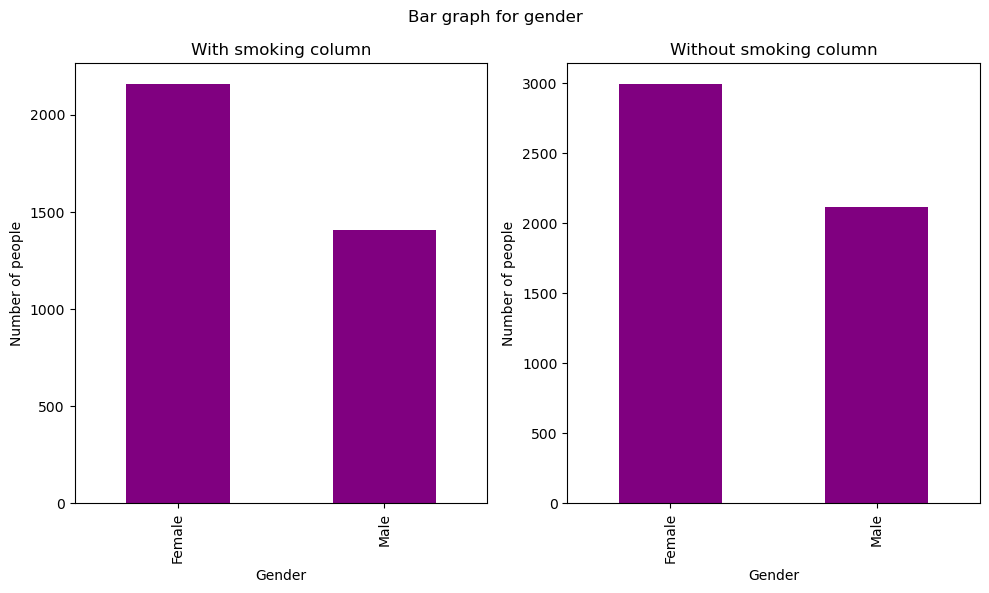

In [27]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
gender1.plot(kind = 'bar', color = 'purple')
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("With smoking column")

plt.subplot(1, 2, 2)
gender2.plot(kind = 'bar', color = 'purple')
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("Without smoking column")

plt.suptitle("Bar graph for gender")
plt.show()

##### Visualization for marriage distribution

In [28]:
married1 = dataset1["ever_married"].value_counts()
married1

Yes    2710
No      855
Name: ever_married, dtype: int64

In [29]:
married2 = dataset2["ever_married"].value_counts()
married2

Yes    3353
No     1756
Name: ever_married, dtype: int64

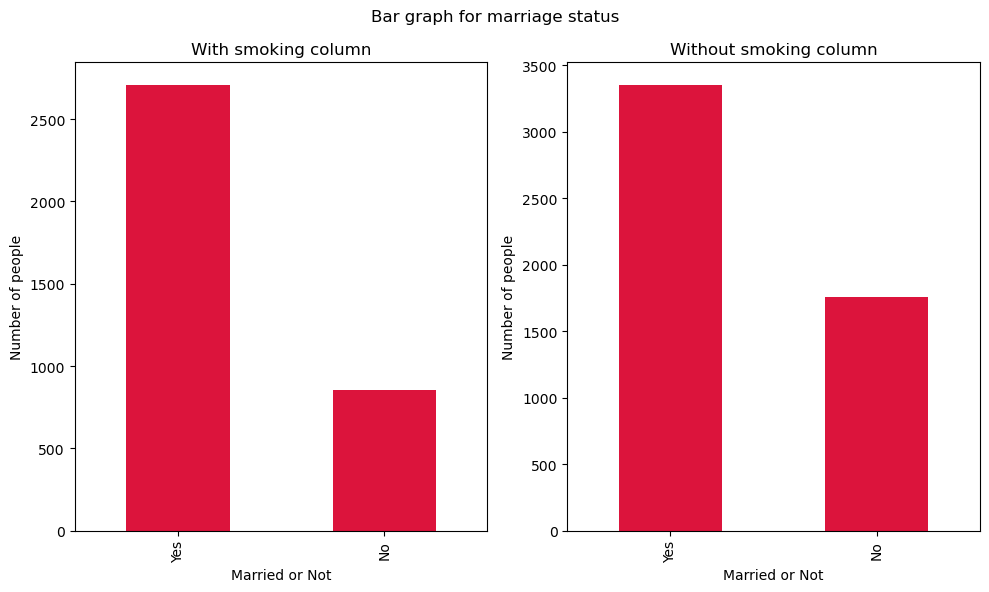

In [30]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
married1.plot(kind = 'bar', color = 'crimson')
plt.xlabel("Married or Not")
plt.ylabel("Number of people")
plt.title("With smoking column")

plt.subplot(1, 2, 2)
married2.plot(kind = 'bar', color = 'crimson')
plt.xlabel("Married or Not")
plt.ylabel("Number of people")
plt.title("Without smoking column")

plt.suptitle("Bar graph for marriage status")
plt.show()


##### Visualization for work force distribution

In [31]:
work1 = dataset1["work_type"].value_counts()
work1

Private          2284
Self-employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64

In [32]:
work2 = dataset2["work_type"].value_counts()
work2

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

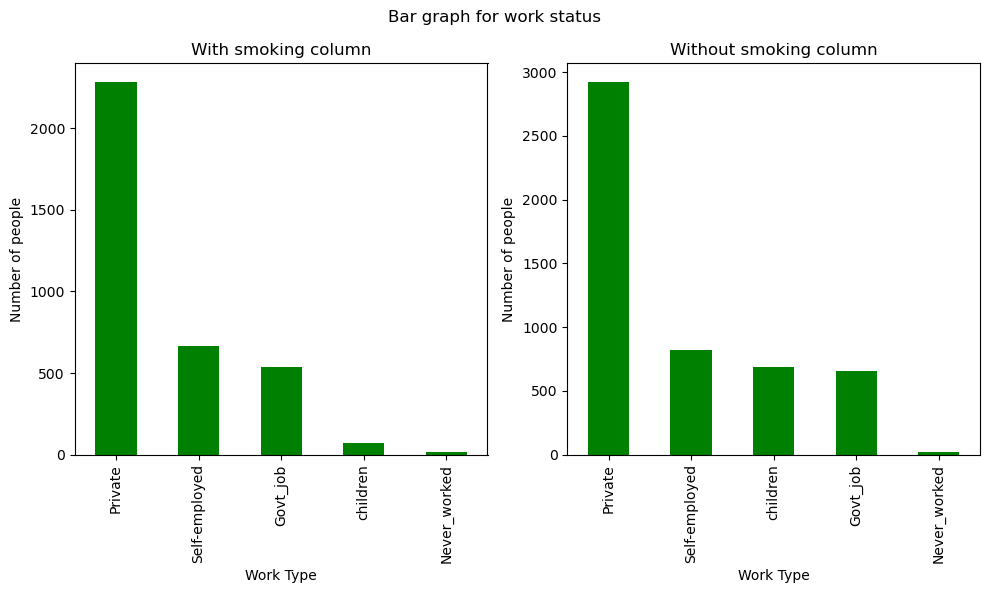

In [33]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
work1.plot(kind = 'bar', color = 'green')
plt.xlabel("Work Type")
plt.ylabel("Number of people")
plt.title("With smoking column")

plt.subplot(1, 2, 2)
work2.plot(kind = 'bar', color = 'green')
plt.xlabel("Work Type")
plt.ylabel("Number of people")
plt.title("Without smoking column")

plt.suptitle("Bar graph for work status")
plt.show()


##### Visualization for residence distribution

In [34]:
residence1 = dataset1["Residence_type"].value_counts()
residence1

Urban    1814
Rural    1751
Name: Residence_type, dtype: int64

In [35]:
residence2 = dataset2["Residence_type"].value_counts()
residence2

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

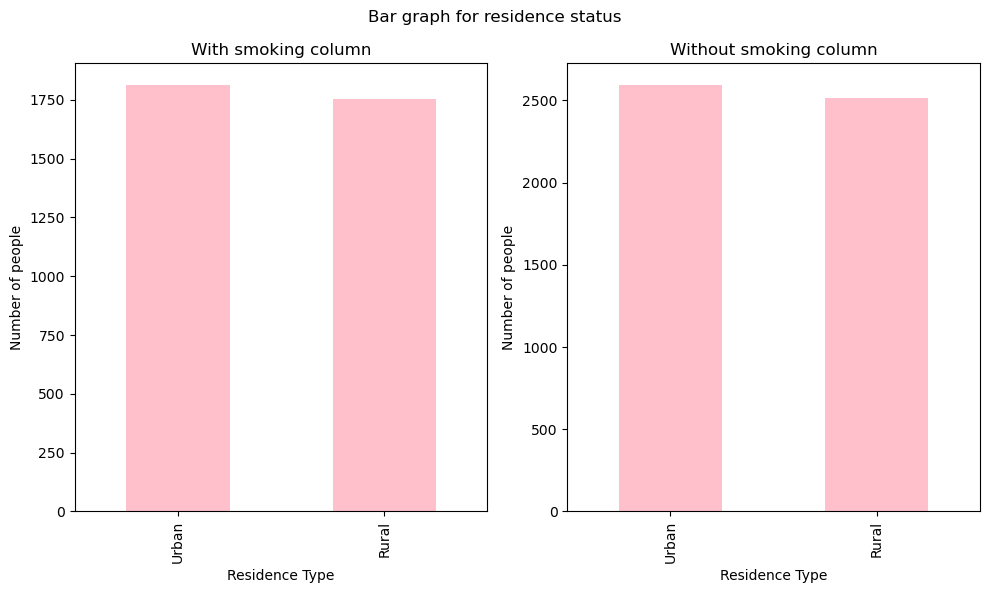

In [36]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
residence1.plot(kind = 'bar', color = 'pink')
plt.xlabel("Residence Type")
plt.ylabel("Number of people")
plt.title("With smoking column")

plt.subplot(1, 2, 2)
residence2.plot(kind = 'bar', color = 'pink')
plt.xlabel("Residence Type")
plt.ylabel("Number of people")
plt.title("Without smoking column")

plt.suptitle("Bar graph for residence status")
plt.show()

##### Visualization for stroke distribution

In [37]:
stroke1 = dataset1["stroke"].value_counts()
stroke1

0    3363
1     202
Name: stroke, dtype: int64

In [38]:
stroke2 = dataset2["stroke"].value_counts()
stroke2

0    4860
1     249
Name: stroke, dtype: int64

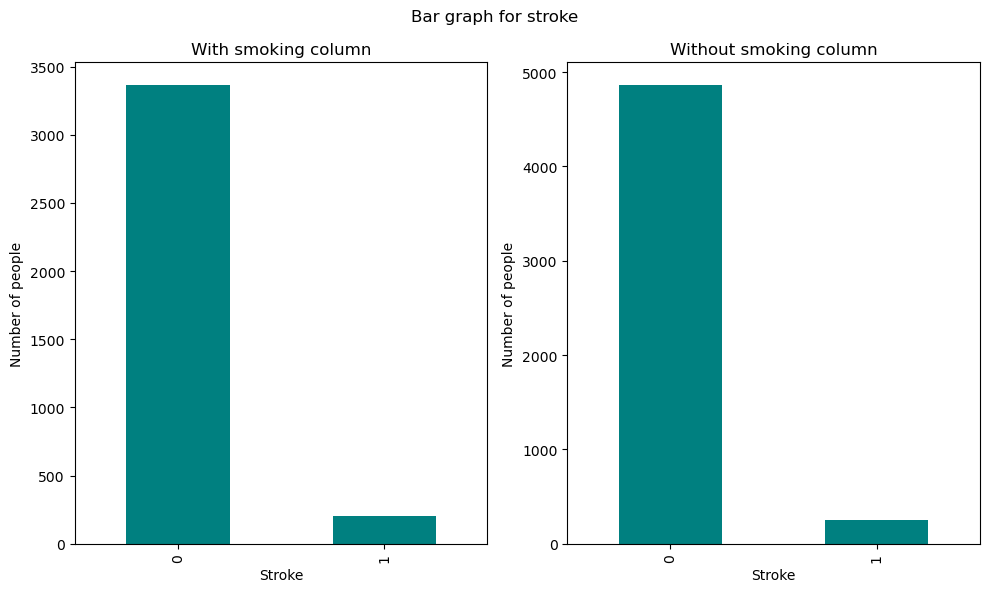

In [39]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
stroke1.plot(kind = 'bar', color = 'teal')
plt.xlabel("Stroke")
plt.ylabel("Number of people")
plt.title("With smoking column")

plt.subplot(1, 2, 2)
stroke2.plot(kind = 'bar', color = 'teal')
plt.xlabel("Stroke")
plt.ylabel("Number of people")
plt.title("Without smoking column")

plt.suptitle("Bar graph for stroke")
plt.show()

In [40]:
ht1 = dataset1["hypertension"].value_counts()
ht1

0    3119
1     446
Name: hypertension, dtype: int64

In [41]:
ht2 = dataset2["hypertension"].value_counts()
ht2

0    4611
1     498
Name: hypertension, dtype: int64

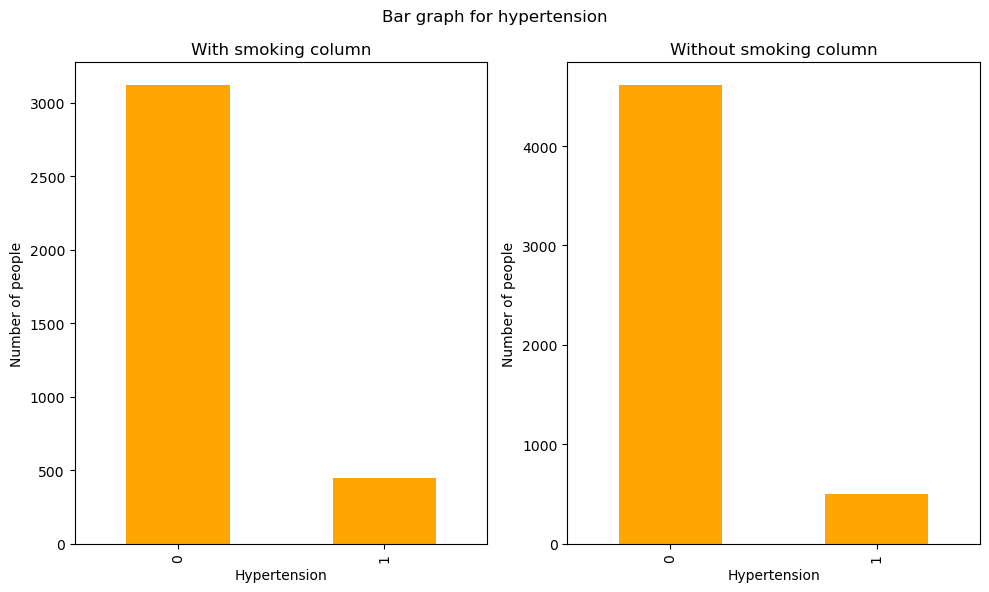

In [42]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
ht1.plot(kind = 'bar', color = 'orange')
plt.xlabel("Hypertension")
plt.ylabel("Number of people")
plt.title("With smoking column")

plt.subplot(1, 2, 2)
ht2.plot(kind = 'bar', color = 'orange')
plt.xlabel("Hypertension")
plt.ylabel("Number of people")
plt.title("Without smoking column")

plt.suptitle("Bar graph for hypertension")
plt.show()

In [43]:
hd1 = dataset1["heart_disease"].value_counts()
hd1

0    3337
1     228
Name: heart_disease, dtype: int64

In [44]:
hd2 = dataset2["heart_disease"].value_counts()
hd2

0    4833
1     276
Name: heart_disease, dtype: int64

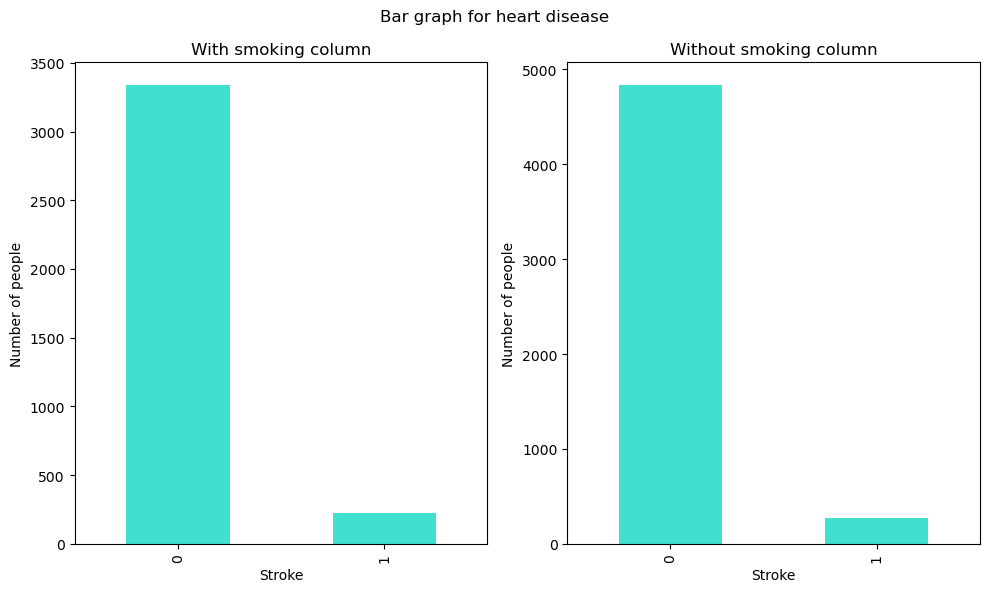

In [45]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
hd1.plot(kind = 'bar', color = 'turquoise')
plt.xlabel("Stroke")
plt.ylabel("Number of people")
plt.title("With smoking column")

plt.subplot(1, 2, 2)
hd2.plot(kind = 'bar', color = 'turquoise')
plt.xlabel("Stroke")
plt.ylabel("Number of people")
plt.title("Without smoking column")

plt.suptitle("Bar graph for heart disease")
plt.show()

### Checking for correlation matrix

In [46]:
correlation1 = dataset1.corr()
correlation1["stroke"].sort_values(ascending = False)

stroke               1.000000
age                  0.250765
hypertension         0.134695
heart_disease        0.129330
avg_glucose_level    0.128773
bmi                  0.007630
Name: stroke, dtype: float64

In [47]:
correlation2 = dataset1.corr()
correlation2["stroke"].sort_values(ascending = False)

stroke               1.000000
age                  0.250765
hypertension         0.134695
heart_disease        0.129330
avg_glucose_level    0.128773
bmi                  0.007630
Name: stroke, dtype: float64

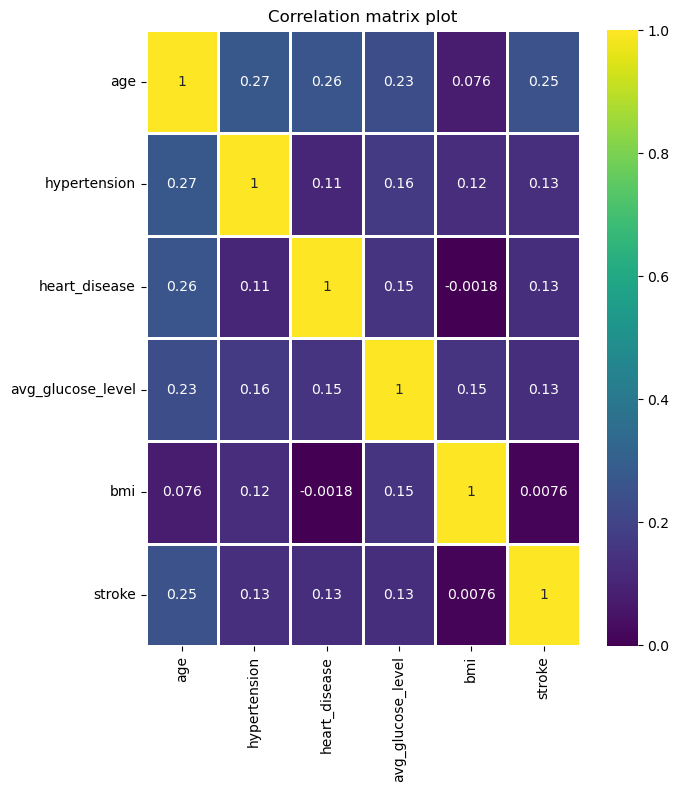

In [48]:
#Since both datasets give the same correlationship we can use any one of them for the correlation matrix plot

plt.figure(figsize = (7, 8))
sns.heatmap(correlation1, annot=True, cmap='viridis', linewidths = 1)

plt.title("Correlation matrix plot")
plt.show()

# Assignment Questions

### Q. Are there more male or female smokers?

In [49]:
dataset1["smoking_status"].value_counts()

never smoked       1892
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [50]:
df1 = dataset1[dataset1["gender"]=='Male']
df2 = dataset1[dataset1["gender"]=='Female']

male = list(df1['smoking_status'].value_counts())
female = list(df2['smoking_status'].value_counts())
label = df1['smoking_status'].value_counts().index.tolist()

In [51]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.500000,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5092,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.900000,never smoked,0
5096,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.200000,never smoked,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,28.893237,smokes,0
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.300000,never smoked,0


In [52]:
label

['never smoked', 'formerly smoked', 'smokes']

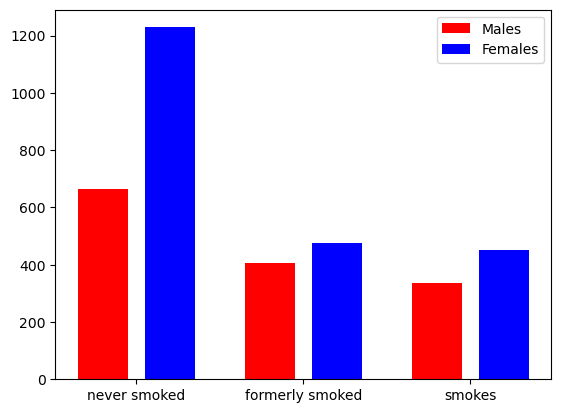

In [53]:
x_axis = np.arange(len(label))
plt.bar(x_axis-0.2, male, width = 0.3, color = 'red', label = 'Males')
plt.bar(x_axis+0.2, female, width = 0.3, color = 'blue', label = 'Females')
plt.xticks(x_axis, label)
plt.legend()

In [54]:
if male[2]>female[2]:
    print("Thus, there are more male smokers.")
else:
    print("Thus, there are more female smokers.")

Thus, there are more female smokers.


### Q. What is the age group with the highest number of smokers?

In [55]:
df1 = dataset1[dataset1["smoking_status"]=='smokes']
df1.shape

(789, 11)

Text(0.5, 1.0, 'Age group histogram for smokers')

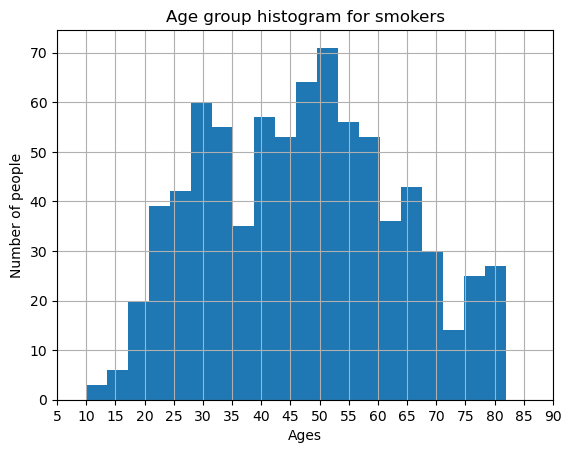

In [56]:
df1["age"].hist(bins=20)
plt.xlabel('Ages')
plt.ylabel('Number of people')
l = []
for i in range(1, 19):
    l.append(i*5)
plt.xticks(l)
plt.title("Age group histogram for smokers")

In [57]:
print("Thus, we can say that most people smoking are in the age group 45-55.")

Thus, we can say that most people smoking are in the age group 45-55.


### Q. Identify the relationship between gender, age and hypertension. Also find out the gender and age group with most hypertension cases

In [58]:
#We use the dataset without the smoking_status column here, since the attribute is irrelevant

df1 = dataset2[["age", "gender", "hypertension"]]
df2 = df1[df1["hypertension"]==1]

##### Correlationship between them 

In [59]:
l = []
for gender in df1.loc[:, "gender"]:
    if (gender=='Female'):
        l.append(1)
    else:
        l.append(0)
df1['gender_cat'] = l
df1.drop("gender", axis = 1, inplace = True)

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3969514054.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender_cat'] = l
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3969514054.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("gender", axis = 1, inplace = True)


In [60]:
correlation = df1.corr()
correlation["hypertension"].sort_values(ascending = False)

hypertension    1.000000
age             0.276367
gender_cat     -0.021223
Name: hypertension, dtype: float64

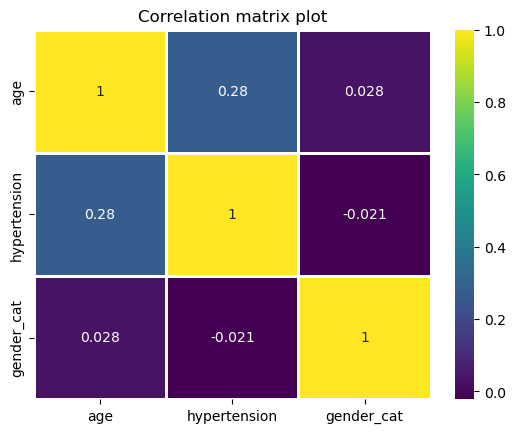

In [61]:
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths = 1)
plt.title("Correlation matrix plot")
plt.show()

##### Gender with most hypertension cases

In [62]:
df3 = df1[df1["gender_cat"]==0]
df4 = df1[df1["gender_cat"]==1]

male = list(df3['hypertension'].value_counts())
female = list(df4['hypertension'].value_counts())
label = df1['hypertension'].value_counts().index.tolist()

In [63]:
label

[0, 1]

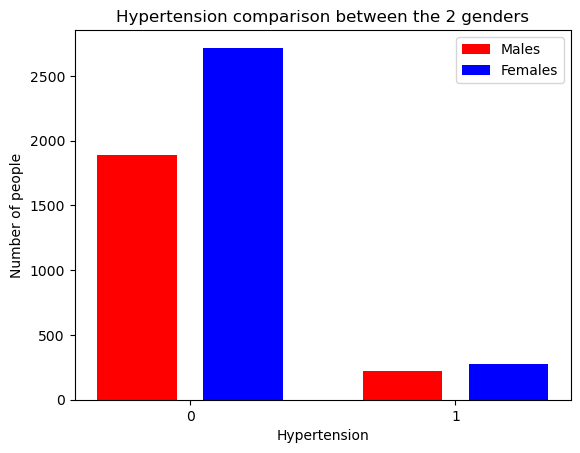

In [64]:
x_axis = np.arange(len(label))
plt.bar(x_axis-0.2, male, width = 0.3, color = 'red', label = 'Males')
plt.bar(x_axis+0.2, female, width = 0.3, color = 'blue', label = 'Females')
plt.xticks(x_axis, label)
plt.title("Hypertension comparison between the 2 genders")
plt.xlabel("Hypertension")
plt.ylabel("Number of people")
plt.legend()

In [65]:
print("Thus, females have more hypertension cases.")

Thus, females have more hypertension cases.


##### Age group with most hypertension cases

Text(0.5, 1.0, 'Age group histogram for hypertension')

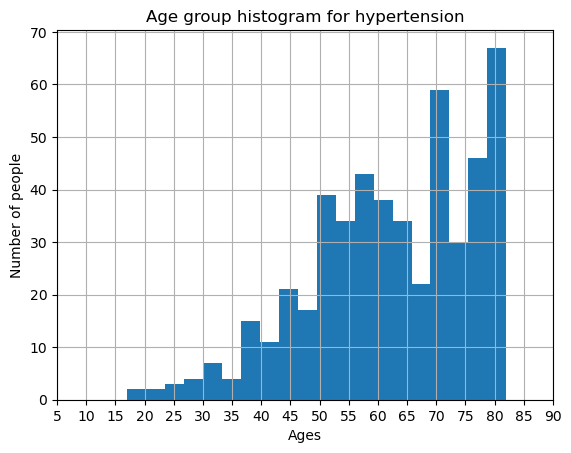

In [66]:
df2["age"].hist(bins=20)
plt.xlabel('Ages')
plt.ylabel('Number of people')
l = []
for i in range(1, 19):
    l.append(i*5)
plt.xticks(l)
plt.title("Age group histogram for hypertension")

In [67]:
print("Thus, most people with hypertension are in the age group 75-85.")

Thus, most people with hypertension are in the age group 75-85.


### Q. Identify the relationship between marriage status, heart disease and hypertension. Also find out whether married people suffer from more heart disease and hypertension or unmarried people

In [68]:
#We use the dataset without the smoking_status column here, since the attribute is irrelevant

df1 = dataset2[["ever_married", "heart_disease", "hypertension"]]

##### Correlationship between marriage status, heart disease and hypertension

In [69]:
l = []
for married in df1.loc[:, "ever_married"]:
    if (married=='Yes'):
        l.append(1)
    else:
        l.append(0)
df1['married_cat'] = l
df1.drop("ever_married", axis = 1, inplace = True)

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3666841175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['married_cat'] = l
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3666841175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("ever_married", axis = 1, inplace = True)


In [70]:
correlation = df1.corr()
correlation["married_cat"].sort_values(ascending = False)

married_cat      1.000000
hypertension     0.164187
heart_disease    0.114601
Name: married_cat, dtype: float64

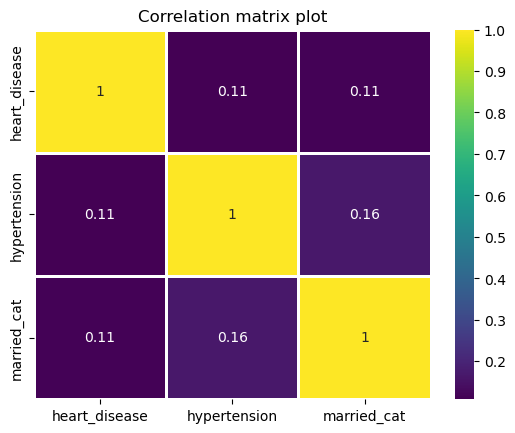

In [71]:
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths = 1)
plt.title("Correlation matrix plot")
plt.show()

##### Which marriage status people have more heart diseases?

In [72]:
df2 = df1[["married_cat", "heart_disease"]]
df3 = df2[df2["married_cat"]==1]
df4 = df2[df2["married_cat"]==0]

yes = list(df3['heart_disease'].value_counts())
no = list(df4['heart_disease'].value_counts())
label = df2['heart_disease'].value_counts().index.tolist()

In [73]:
label

[0, 1]

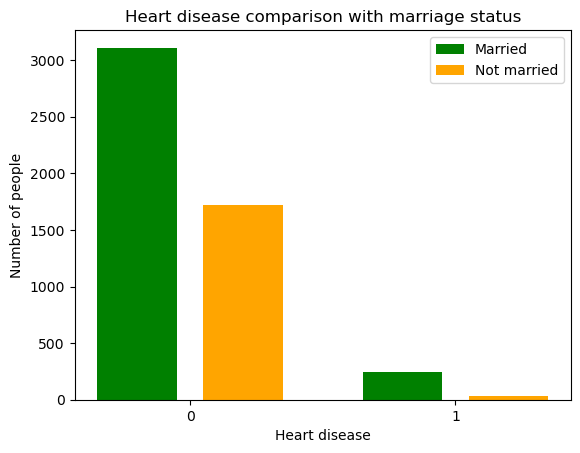

In [74]:
x_axis = np.arange(len(label))
plt.bar(x_axis-0.2, yes, width = 0.3, color = 'green', label = 'Married')
plt.bar(x_axis+0.2, no, width = 0.3, color = 'orange', label = 'Not married')
plt.xticks(x_axis, label)
plt.title("Heart disease comparison with marriage status")
plt.xlabel("Heart disease")
plt.ylabel("Number of people")
plt.legend()

In [75]:
print("Thus, there are fewer unmarried people with heart disease as compared to married people.")

Thus, there are fewer unmarried people with heart disease as compared to married people.


##### Which marriage status people have more heart diseases?

In [76]:
df2 = df1[["married_cat", "hypertension"]]
df3 = df2[df2["married_cat"]==1]
df4 = df2[df2["married_cat"]==0]

yes = list(df3['hypertension'].value_counts())
no = list(df4['hypertension'].value_counts())
label = df2['hypertension'].value_counts().index.tolist()

In [77]:
label

[0, 1]

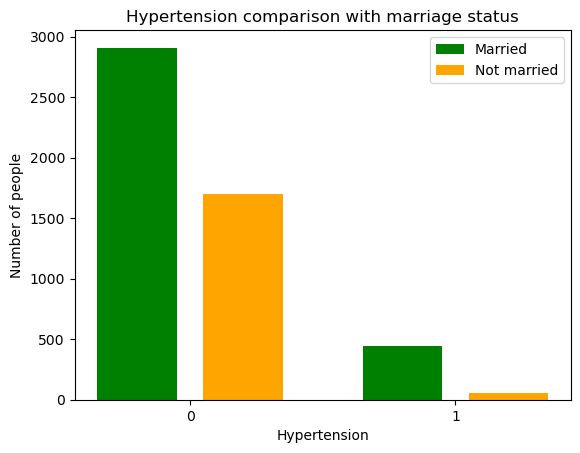

In [78]:
x_axis = np.arange(len(label))
plt.bar(x_axis-0.2, yes, width = 0.3, color = 'green', label = 'Married')
plt.bar(x_axis+0.2, no, width = 0.3, color = 'orange', label = 'Not married')
plt.xticks(x_axis, label)
plt.title("Hypertension comparison with marriage status")
plt.xlabel("Hypertension")
plt.ylabel("Number of people")
plt.legend()

In [79]:
print("Thus, there are fewer unmarried people with hypertension as compared to married people.")

Thus, there are fewer unmarried people with hypertension as compared to married people.


### Q. Identify the relationship between heart disease, hypertension, work type and glucose

In [80]:
#We use the dataset without the smoking_status column here, since the attribute is irrelevant

df1 = dataset2[["avg_glucose_level", "work_type", "heart_disease", "hypertension"]]

In [81]:
from sklearn.preprocessing import OrdinalEncoder
attr = ["work_type"]
encoder = OrdinalEncoder()
df1.loc[:, attr] = encoder.fit_transform(df1.loc[:, attr])

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3561363291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, attr] = encoder.fit_transform(df1.loc[:, attr])


In [82]:
encoder.categories_

[array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object)]

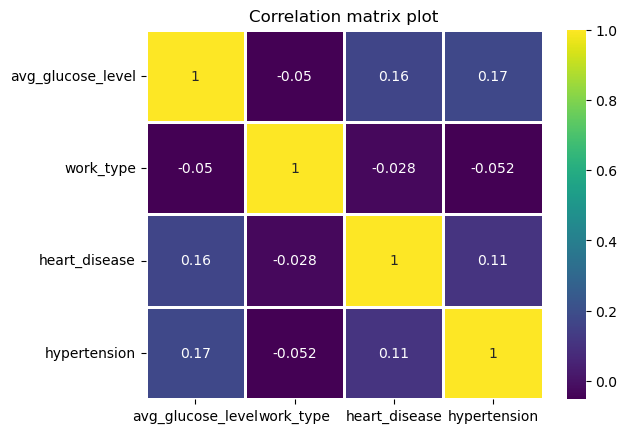

In [83]:
correlation = df1.corr()
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths = 1)
plt.title("Correlation matrix plot")
plt.show()

### Q. Compare the glucose level on the basis of residency type (rural and urban)

In [84]:
#We use the dataset without the smoking_status column here, since the attribute is irrelevant

df1 = dataset2[["avg_glucose_level", "Residence_type"]]
df2 = df1[df1["Residence_type"]=='Rural']
df3 = df1[df1["Residence_type"]=='Urban']

Text(0.5, 0.98, 'Histograms comparing glucose level on the basis of residency type')

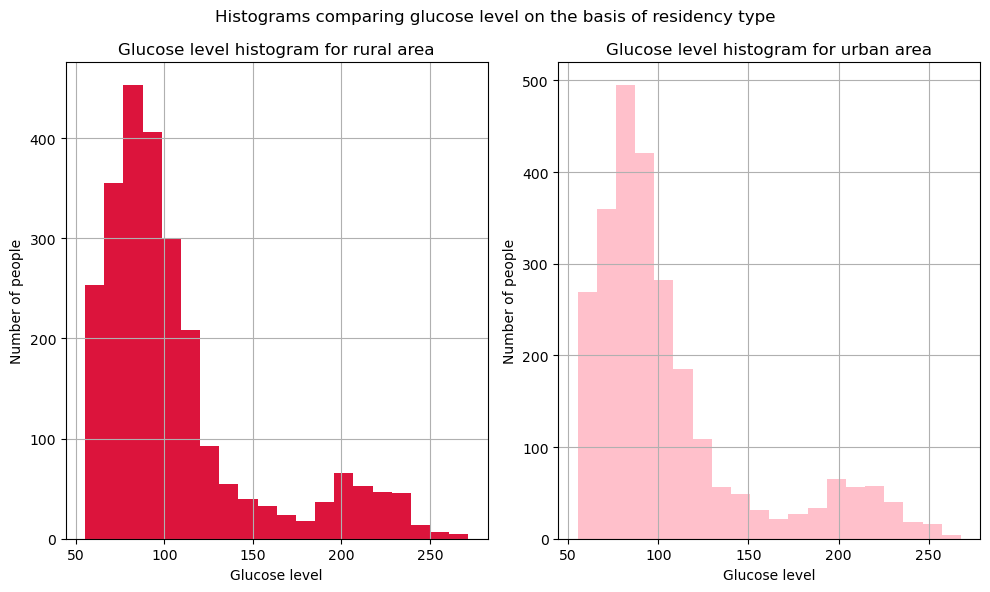

In [85]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
df2["avg_glucose_level"].hist(bins=20, color = 'crimson')
plt.xlabel('Glucose level')
plt.ylabel('Number of people')
plt.title("Glucose level histogram for rural area")

plt.subplot(1, 2, 2)
df3["avg_glucose_level"].hist(bins=20, color = 'pink')
plt.xlabel('Glucose level')
plt.ylabel('Number of people')
plt.title("Glucose level histogram for urban area")

plt.suptitle('Histograms comparing glucose level on the basis of residency type')

### Q. Compare the BMI of people working in private and government jobs

In [86]:
#We use the dataset without the smoking_status column here, since the attribute is irrelevant

df1 = dataset2[["bmi", "work_type"]]
df2 = df1[df1["work_type"]=='Private']
df3 = df1[df1["work_type"]=='Govt_job']

Text(0.5, 0.98, 'BMI histogram for people in private and government jobs')

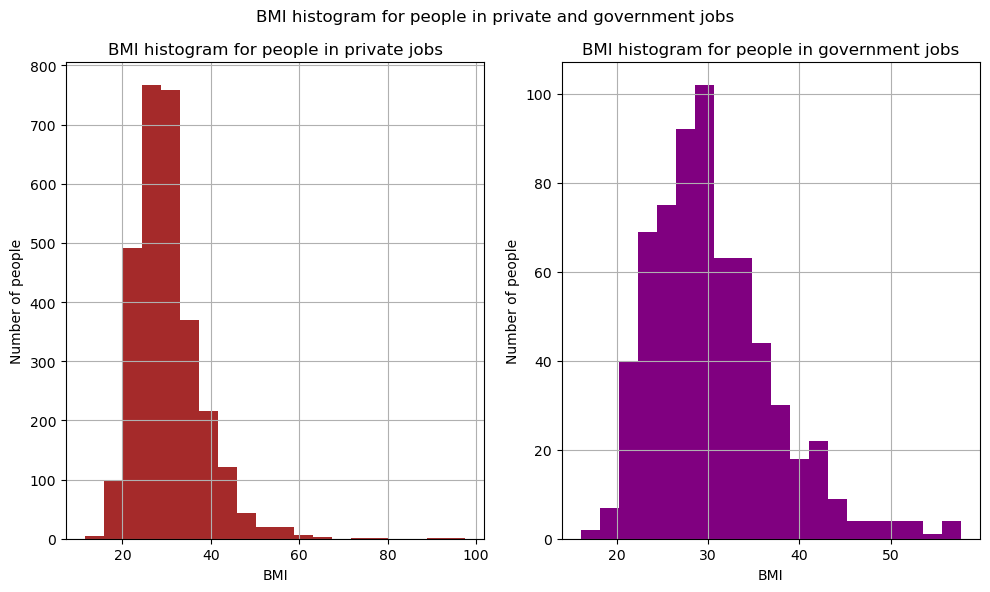

In [87]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
df2["bmi"].hist(bins=20, color = 'brown')
plt.xlabel('BMI')
plt.ylabel('Number of people')
plt.title("BMI histogram for people in private jobs")

plt.subplot(1, 2, 2)
df3["bmi"].hist(bins=20, color = 'purple')
plt.xlabel('BMI')
plt.ylabel('Number of people')
plt.title("BMI histogram for people in government jobs")

plt.suptitle("BMI histogram for people in private and government jobs")

### Q. Make two models -- one with the smoking column and one without the smoking column

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

#### With smoking column

In [89]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3565 non-null   object 
 1   age                3565 non-null   float64
 2   hypertension       3565 non-null   int64  
 3   heart_disease      3565 non-null   int64  
 4   ever_married       3565 non-null   object 
 5   work_type          3565 non-null   object 
 6   Residence_type     3565 non-null   object 
 7   avg_glucose_level  3565 non-null   float64
 8   bmi                3565 non-null   float64
 9   smoking_status     3565 non-null   object 
 10  stroke             3565 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 334.2+ KB


In [90]:
x = dataset1.iloc[:, :-1]
y = dataset1.iloc[:, -1]

In [91]:
#Since we have inequal target values, we use stratified train test split

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index

In [92]:
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

In [93]:
y_train = y.iloc[i1]
y_test = y.iloc[i2]

In [94]:
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\2005349423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])


In [95]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)]

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

In [97]:
pca.explained_variance_ratio_

array([0.86174616, 0.119755  ])

In [98]:
x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3560152658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


In [99]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(random_state = 42)
classifier1.fit(x_train2, y_train)

y_pred = classifier1.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[622  51]
 [ 34   6]]
The f1 score is 0.12371134020618553
The accuracy score is 0.8807854137447405
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       673
           1       0.11      0.15      0.12        40

    accuracy                           0.88       713
   macro avg       0.53      0.54      0.53       713
weighted avg       0.90      0.88      0.89       713



In [100]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit(x_train2, y_train)

y_pred = classifier2.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[673   0]
 [ 40   0]]
The f1 score is 0.0
The accuracy score is 0.9438990182328191
The classification report is: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       673
           1       0.00      0.00      0.00        40

    accuracy                           0.94       713
   macro avg       0.47      0.50      0.49       713
weighted avg       0.89      0.94      0.92       713



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 250, random_state = 42) #grid search was not used, but I experimented with a few values for n_neighbors. This gave the best result
classifier3.fit(x_train2, y_train)

y_pred = classifier3.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[665   8]
 [ 36   4]]
The f1 score is 0.15384615384615383
The accuracy score is 0.938288920056101
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       673
           1       0.33      0.10      0.15        40

    accuracy                           0.94       713
   macro avg       0.64      0.54      0.56       713
weighted avg       0.91      0.94      0.92       713



In [102]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(x_train2, y_train)

y_pred = classifier4.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[666   7]
 [ 38   2]]
The f1 score is 0.0816326530612245
The accuracy score is 0.9368863955119214
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       673
           1       0.22      0.05      0.08        40

    accuracy                           0.94       713
   macro avg       0.58      0.52      0.52       713
weighted avg       0.91      0.94      0.92       713



In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier5 = KNeighborsClassifier() 
classifier5.fit(x_train2, y_train)

y_pred = classifier5.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[667   6]
 [ 38   2]]
The f1 score is 0.08333333333333334
The accuracy score is 0.938288920056101
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       673
           1       0.25      0.05      0.08        40

    accuracy                           0.94       713
   macro avg       0.60      0.52      0.53       713
weighted avg       0.91      0.94      0.92       713



D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [104]:
from sklearn.svm import LinearSVC
classifier6 = LinearSVC()
classifier6.fit(x_train2, y_train)

y_pred = classifier6.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[673   0]
 [ 40   0]]
The f1 score is 0.0
The accuracy score is 0.9438990182328191
The classification report is: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       673
           1       0.00      0.00      0.00        40

    accuracy                           0.94       713
   macro avg       0.47      0.50      0.49       713
weighted avg       0.89      0.94      0.92       713



D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

In [105]:
from sklearn.svm import SVC
classifier7 = SVC(kernel = 'rbf')
classifier7.fit(x_train2, y_train)

y_pred = classifier7.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[673   0]
 [ 40   0]]
The f1 score is 0.0
The accuracy score is 0.9438990182328191
The classification report is: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       673
           1       0.00      0.00      0.00        40

    accuracy                           0.94       713
   macro avg       0.47      0.50      0.49       713
weighted avg       0.89      0.94      0.92       713



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
from sklearn.svm import SVC
classifier8 = SVC(kernel = 'sigmoid')
classifier8.fit(x_train2, y_train)

y_pred = classifier8.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[646  27]
 [ 37   3]]
The f1 score is 0.08571428571428572
The accuracy score is 0.9102384291725105
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       673
           1       0.10      0.07      0.09        40

    accuracy                           0.91       713
   macro avg       0.52      0.52      0.52       713
weighted avg       0.90      0.91      0.90       713



Since we get the best f1 score using Random Forest classifier, we are only going to use that model for our corresponding questions

In [107]:
#Using ROS to deal with imbalance in target values

from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_train_sample, y_train_sample = sampler.fit_resample(x_train2, y_train)
x_test_sample, y_test_sample = sampler.fit_resample(x_test2, y_test)

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250, random_state = 42) #grid search was not used, but I experimented with a few values for n_neighbors. This gave the best result
classifier.fit(x_train_sample, y_train_sample)

y_pred = classifier.predict(x_test_sample)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test_sample, y_pred))
print(f'The f1 score is {f1_score(y_test_sample, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test_sample, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test_sample, y_pred))

The confusion matrix is given by: 
[[640  33]
 [652  21]]
The f1 score is 0.0577716643741403
The accuracy score is 0.49108469539375926
The classification report is: 
              precision    recall  f1-score   support

           0       0.50      0.95      0.65       673
           1       0.39      0.03      0.06       673

    accuracy                           0.49      1346
   macro avg       0.44      0.49      0.35      1346
weighted avg       0.44      0.49      0.35      1346



### Without smoking column

In [109]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 439.1+ KB


In [110]:
x = dataset2.iloc[:, :-1]
y = dataset2.iloc[:, -1]

In [111]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index

In [112]:
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

In [113]:
y_train = y.iloc[i1]
y_test = y.iloc[i2]

In [114]:
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\2820529123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])


In [115]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object)]

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

In [117]:
pca.explained_variance_ratio_

array([0.79126837, 0.18763422])

In [118]:
x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3560152658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


In [119]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

The confusion matrix is given by: 
[[966   6]
 [ 50   0]]
The f1 score is 0.0
The accuracy score is 0.9452054794520548
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [120]:
#Using ROS to deal with imbalance in target values

from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_train_sample, y_train_sample = sampler.fit_resample(x_train2, y_train)
x_test_sample, y_test_sample = sampler.fit_resample(x_test2, y_test)

In [121]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250, random_state = 42)
classifier.fit(x_train_sample, y_train_sample)

y_pred = classifier.predict(x_test_sample)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test_sample, y_pred))
print(f'The f1 score is {f1_score(y_test_sample, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test_sample, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test_sample, y_pred))

The confusion matrix is given by: 
[[948  24]
 [913  59]]
The f1 score is 0.11184834123222749
The accuracy score is 0.5180041152263375
The classification report is: 
              precision    recall  f1-score   support

           0       0.51      0.98      0.67       972
           1       0.71      0.06      0.11       972

    accuracy                           0.52      1944
   macro avg       0.61      0.52      0.39      1944
weighted avg       0.61      0.52      0.39      1944



### Q. Predict stroke only for private company and government company employees in 2 different models

In [122]:
#We will take the smoking column as it gives better f1 score

dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3565 non-null   object 
 1   age                3565 non-null   float64
 2   hypertension       3565 non-null   int64  
 3   heart_disease      3565 non-null   int64  
 4   ever_married       3565 non-null   object 
 5   work_type          3565 non-null   object 
 6   Residence_type     3565 non-null   object 
 7   avg_glucose_level  3565 non-null   float64
 8   bmi                3565 non-null   float64
 9   smoking_status     3565 non-null   object 
 10  stroke             3565 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 334.2+ KB


In [123]:
dataset1["work_type"].value_counts()

Private          2284
Self-employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64

In [124]:
df1 = dataset1[dataset1["work_type"]=='Private']
df2 = dataset1[dataset1["work_type"]=='Govt_job']

In [125]:
private = list(df1['stroke'].value_counts())
govt = list(df2['stroke'].value_counts())
label = df2['heart_disease'].value_counts().index.tolist()

In [126]:
label

[0, 1]

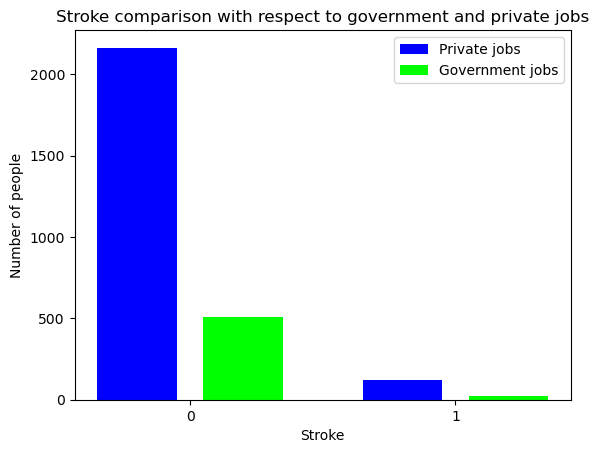

In [127]:
x_axis = np.arange(len(label))
plt.bar(x_axis-0.2, private, width = 0.3, color = 'blue', label = 'Private jobs')
plt.bar(x_axis+0.2, govt, width = 0.3, color = 'lime', label = 'Government jobs')
plt.xticks(x_axis, label)
plt.title("Stroke comparison with respect to government and private jobs")
plt.xlabel("Stroke")
plt.ylabel("Number of people")
plt.legend()

##### Stroke prediction for private job employees

In [128]:
#Splitting the dataset
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

#Applying stratified train-test split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index
    
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

y_train = y.iloc[i1]
y_test = y.iloc[i2]

#Applying transformations
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

#Training the model and printing the results
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3752249470.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3752249470.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


The confusion matrix is given by: 
[[426   7]
 [ 24   0]]
The f1 score is 0.0
The accuracy score is 0.9321663019693655
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       433
           1       0.00      0.00      0.00        24

    accuracy                           0.93       457
   macro avg       0.47      0.49      0.48       457
weighted avg       0.90      0.93      0.91       457



##### Stroke detection in government employees

In [129]:
#Splitting the dataset
x = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

#Applying stratified train-test split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index
    
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

y_train = y.iloc[i1]
y_test = y.iloc[i2]

#Applying transformations
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

#Training the model and printing the results
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\1809807110.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\1809807110.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


The confusion matrix is given by: 
[[102   0]
 [  5   0]]
The f1 score is 0.0
The accuracy score is 0.9532710280373832
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       102
           1       0.00      0.00      0.00         5

    accuracy                           0.95       107
   macro avg       0.48      0.50      0.49       107
weighted avg       0.91      0.95      0.93       107



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Q. Predict stroke for private and government company employees in rural and urban area in 4 different models

In [130]:
#Using the dataset with smoking column as it previously gave better f1 score

dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3565 non-null   object 
 1   age                3565 non-null   float64
 2   hypertension       3565 non-null   int64  
 3   heart_disease      3565 non-null   int64  
 4   ever_married       3565 non-null   object 
 5   work_type          3565 non-null   object 
 6   Residence_type     3565 non-null   object 
 7   avg_glucose_level  3565 non-null   float64
 8   bmi                3565 non-null   float64
 9   smoking_status     3565 non-null   object 
 10  stroke             3565 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 334.2+ KB


In [131]:
dataset1["work_type"].value_counts()

Private          2284
Self-employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64

In [132]:
dataset1["Residence_type"].value_counts()

Urban    1814
Rural    1751
Name: Residence_type, dtype: int64

In [133]:
df_urban = dataset1[dataset1["Residence_type"]=='Urban']
df_rural = dataset1[dataset1["Residence_type"]=='Rural']

In [134]:
df1 = df_urban[df_urban["work_type"]=='Private']
df2 = df_urban[df_urban["work_type"]=='Govt_job']

df3 = df_rural[df_rural["work_type"]=='Private']
df4 = df_rural[df_rural["work_type"]=='Govt_job']

In [135]:
urban_private = list(df1['stroke'].value_counts())
urban_govt = list(df2['stroke'].value_counts())

rural_private = list(df3['stroke'].value_counts())
rural_govt = list(df4['stroke'].value_counts())

label = df2['heart_disease'].value_counts().index.tolist()

In [136]:
label

[0, 1]

Text(0.5, 0.98, 'Stroke comparison with respect to government and private jobs')

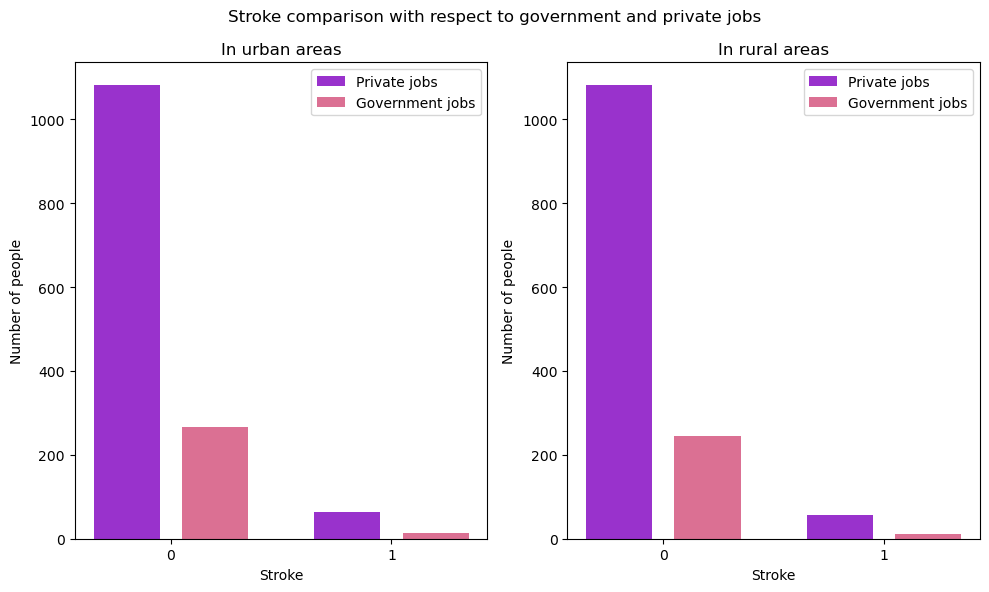

In [137]:
plt.figure(figsize=(10, 6), tight_layout=True)

plt.subplot(1, 2, 1)
x_axis = np.arange(len(label))
plt.bar(x_axis-0.2, urban_private, width = 0.3, color = 'darkorchid', label = 'Private jobs')
plt.bar(x_axis+0.2, urban_govt, width = 0.3, color = 'palevioletred', label = 'Government jobs')
plt.xticks(x_axis, label)
plt.title("In urban areas")
plt.xlabel("Stroke")
plt.ylabel("Number of people")
plt.legend()

plt.subplot(1, 2, 2)
x_axis = np.arange(len(label))
plt.bar(x_axis-0.2, rural_private, width = 0.3, color = 'darkorchid', label = 'Private jobs')
plt.bar(x_axis+0.2, rural_govt, width = 0.3, color = 'palevioletred', label = 'Government jobs')
plt.xticks(x_axis, label)
plt.title("In rural areas")
plt.xlabel("Stroke")
plt.ylabel("Number of people")
plt.legend()

plt.suptitle("Stroke comparison with respect to government and private jobs")

##### Stroke prediction model for private employees in urban areas

In [138]:
#Splitting the dataset
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

#Applying stratified train-test split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index
    
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

y_train = y.iloc[i1]
y_test = y.iloc[i2]

#Applying transformations
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

#Training the model and printing the results
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3752249470.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3752249470.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


The confusion matrix is given by: 
[[213   4]
 [ 13   0]]
The f1 score is 0.0
The accuracy score is 0.9260869565217391
The classification report is: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       217
           1       0.00      0.00      0.00        13

    accuracy                           0.93       230
   macro avg       0.47      0.49      0.48       230
weighted avg       0.89      0.93      0.91       230



##### Stroke prediction model for government employees in urban areas

In [139]:
#Splitting the dataset
x = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

#Applying stratified train-test split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index
    
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

y_train = y.iloc[i1]
y_test = y.iloc[i2]

#Applying transformations
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

#Training the model and printing the results
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\1809807110.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\1809807110.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


The confusion matrix is given by: 
[[53  0]
 [ 3  0]]
The f1 score is 0.0
The accuracy score is 0.9464285714285714
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.00      0.00      0.00         3

    accuracy                           0.95        56
   macro avg       0.47      0.50      0.49        56
weighted avg       0.90      0.95      0.92        56



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Stroke prediction model for private employees in rural areas

In [140]:
#Splitting the dataset
x = df3.iloc[:, :-1]
y = df3.iloc[:, -1]

#Applying stratified train-test split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index
    
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

y_train = y.iloc[i1]
y_test = y.iloc[i2]

#Applying transformations
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

#Training the model and printing the results
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\2149416764.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\2149416764.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


The confusion matrix is given by: 
[[215   2]
 [ 11   0]]
The f1 score is 0.0
The accuracy score is 0.9429824561403509
The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       217
           1       0.00      0.00      0.00        11

    accuracy                           0.94       228
   macro avg       0.48      0.50      0.49       228
weighted avg       0.91      0.94      0.92       228



##### Stroke prediction model for government employees in rural areas

In [141]:
#Splitting the dataset
x = df4.iloc[:, :-1]
y = df4.iloc[:, -1]

#Applying stratified train-test split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index
    
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]

y_train = y.iloc[i1]
y_test = y.iloc[i2]

#Applying transformations
from sklearn.preprocessing import OrdinalEncoder
attr = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OrdinalEncoder()
x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train2 = pca.fit_transform(x_train)

x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])
x_test2 = pca.fit_transform(x_test)

#Training the model and printing the results
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250)
classifier.fit(x_train2, y_train)

y_pred = classifier.predict(x_test2)
print("The confusion matrix is given by: ")
print(confusion_matrix(y_test, y_pred))
print(f'The f1 score is {f1_score(y_test, y_pred)}')
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
print("The classification report is: ")
print(classification_report(y_test, y_pred))

C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3573729978.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, attr] = encoder.fit_transform(x_train.loc[:, attr])
C:\Users\sudat\AppData\Local\Temp\ipykernel_14172\3573729978.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.loc[:, attr] = encoder.transform(x_test.loc[:, attr])


The confusion matrix is given by: 
[[50  0]
 [ 2  0]]
The f1 score is 0.0
The accuracy score is 0.9615384615384616
The classification report is: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.00      0.00      0.00         2

    accuracy                           0.96        52
   macro avg       0.48      0.50      0.49        52
weighted avg       0.92      0.96      0.94        52



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
